In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [2]:
import csv #csv file open
import numpy as np #numerical
import tensorflow as tf #framework
from tensorflow.keras.preprocessing.image import ImageDataGenerator #dataset generate
from os import getcwd #currentworking d irectiry
import matplotlib.pyplot as plt
import matplotlib.cm as cm


C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

In [3]:
import pandas as pd #csv file read

In [4]:
train =  pd.read_csv("digit-recognizer/train.csv") 
test =  pd.read_csv("digit-recognizer/test.csv")

In [5]:
test.shape

(28000, 784)

In [6]:
train.head() 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
images = train.iloc[:,1:].values 
images = images.astype(np.float)
images = np.multiply(images, 1.0 / 255.0)

print('images({0[0]},{0[1]})'.format(images.shape))


# convert from [0:255] => [0.0:1.0]


images(42000,784)


In [8]:
train_images = images.reshape(42000,28,28,1) #imagesamples,28x28 pixels,colorchannel

In [9]:
test_images = test.to_numpy()
print(test_images.shape)
test_images = test_images.reshape(28000,28,28,1)
test_images = test_images/255.0 
print(test_images.shape)

(28000, 784)
(28000, 28, 28, 1)


In [10]:
len(test_images)

28000

In [11]:
test_images.shape

(28000, 28, 28, 1)

In [12]:
df1 = train.iloc[:, 0:1]
train_labels = df1.to_numpy()
train_labels = train_labels.reshape(42000,)
train_labels.shape

(42000,)

In [13]:
train_labels = train_labels.astype('uint8')

In [14]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
    ])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [16]:
history = model.fit(
        train_images, train_labels, epochs=12
    )

Epoch 1/12
42000/42000 [==============================] - 36s 854us/sample - loss: 0.1814 - acc: 0.9463
Epoch 2/12
42000/42000 [==============================] - 40s 945us/sample - loss: 0.0586 - acc: 0.9824
Epoch 3/12
42000/42000 [==============================] - 44s 1ms/sample - loss: 0.0359 - acc: 0.9890
Epoch 4/12
42000/42000 [==============================] - 39s 928us/sample - loss: 0.0247 - acc: 0.9918
Epoch 5/12
42000/42000 [==============================] - 38s 896us/sample - loss: 0.0160 - acc: 0.9952
Epoch 6/12
42000/42000 [==============================] - 38s 894us/sample - loss: 0.0122 - acc: 0.9961
Epoch 7/12
42000/42000 [==============================] - 40s 952us/sample - loss: 0.0096 - acc: 0.9971
Epoch 8/12
42000/42000 [==============================] - 37s 878us/sample - loss: 0.0062 - acc: 0.9979
Epoch 9/12
42000/42000 [==============================] - 37s 890us/sample - loss: 0.0057 - acc: 0.9980
Epoch 10/12
42000/42000 [==============================] - 37s 887

In [17]:
model.save("model")


In [18]:
model.predict(train_images[[0]])

array([[1.17578905e-10, 9.99987721e-01, 1.44295200e-07, 1.10951186e-13,
        7.03547266e-06, 1.57432600e-09, 5.23817789e-09, 1.75603632e-09,
        5.13605710e-06, 2.68692624e-09]], dtype=float32)

In [19]:
x = np.argmax(model.predict(test_images[[6]]))
x

0

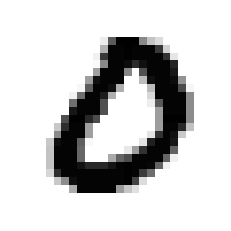

In [20]:
def display(img):
    
    # (784) => (28,28)
    one_image = img.reshape(28,28)
    
    plt.axis('off')
    plt.imshow(one_image, cmap=cm.binary)

# output image     
display(test_images[6])

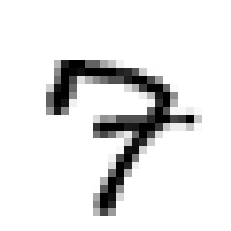

In [21]:
display(test_images[5])

In [22]:
x = np.argmax(model.predict(test_images[[5]]))
print(x)

7


In [23]:
sub = pd.read_csv("digit-recognizer/sample_submission.csv")


In [24]:
sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [25]:
len(test_images)

28000

In [26]:
len(sub)

28000

In [27]:

for i in range(len(sub)):
    #temp  = sub.Label[i]
    img = test_images[[i]]
    pred = model.predict(img)
    pred = np.argmax(pred)
    sub.Label[i]  = pred
    


In [28]:
sub.to_csv("sample_submission.csv",index=False)


In [29]:
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [30]:
import requests
from PIL import Image
from numpy import asarray
import cv2


In [42]:
def predict_image(url):
    response = requests.get(url, stream = True)
    img = Image.open(response.raw)
    #plt.imshow(img)
    img_array = np.asarray(img)
    resized = cv2.resize(img_array, (28,28))
    gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)  #(28, 28)
    image = cv2.bitwise_not(gray_scale)

    #plt.imshow(image, cmap=plt.get_cmap('gray'))

    return np.argmax(model.predict(image.reshape(1,28,28,1)))

In [43]:
url = "https://i.stack.imgur.com/Ds5Rc.png"

In [44]:
print(predict_image(url))

6
